ANN and CNN Tryout <br>
By: Lie Reubensto

# CASE 1 (ANN)

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from scipy.stats import mstats
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder as LE, StandardScaler as SS
from sklearn.metrics import accuracy_score as acc, precision_score as pres, recall_score as recall, f1_score as f1
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
# Load Data
path = "./DATA1.csv"
data = pd.read_csv(path,index_col=0)

In [3]:
# See first five rows of data
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [4]:
# See data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Col1       310 non-null    float64
 1   Col2       310 non-null    float64
 2   Col3       310 non-null    float64
 3   Col4       310 non-null    float64
 4   Col5       310 non-null    float64
 5   Col6       310 non-null    float64
 6   Col7       310 non-null    float64
 7   Col8       310 non-null    float64
 8   Col9       310 non-null    float64
 9   Col10      310 non-null    float64
 10  Col11      310 non-null    float64
 11  Col12      310 non-null    float64
 12  Class_att  310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 33.9+ KB


In [5]:
# See descriptive statistics of data
data.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [6]:
# Check duplicated rows
data.duplicated().sum()

0

In [7]:
# Check unique elements from each column
print(f'count of unique elements:\n{data.nunique()}')

count of unique elements:
Col1         310
Col2         310
Col3         280
Col4         281
Col5         310
Col6         310
Col7         310
Col8         310
Col9         310
Col10        310
Col11        310
Col12        310
Class_att      2
dtype: int64


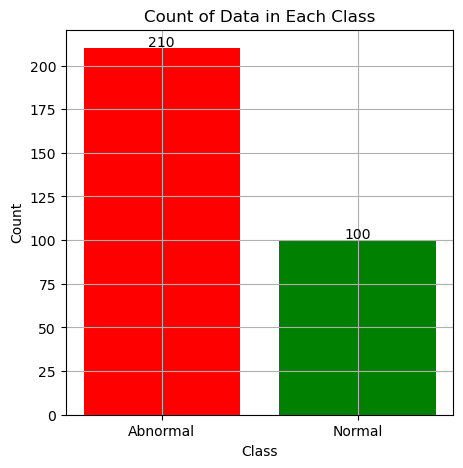

In [8]:
# See amount of data each class has
plt.figure(figsize=(5, 5))
class_counts = data['Class_att'].value_counts()
bar = plt.bar(class_counts.index, class_counts.values,color=['red','green'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Data in Each Class')
for bar, count in zip(bar, class_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2 , bar.get_height() + 1, str(count), ha='center', color='black')
plt.grid(visible=True)
plt.show()

In [9]:
# Check missing value from data
data.isnull().sum()

Col1         0
Col2         0
Col3         0
Col4         0
Col5         0
Col6         0
Col7         0
Col8         0
Col9         0
Col10        0
Col11        0
Col12        0
Class_att    0
dtype: int64

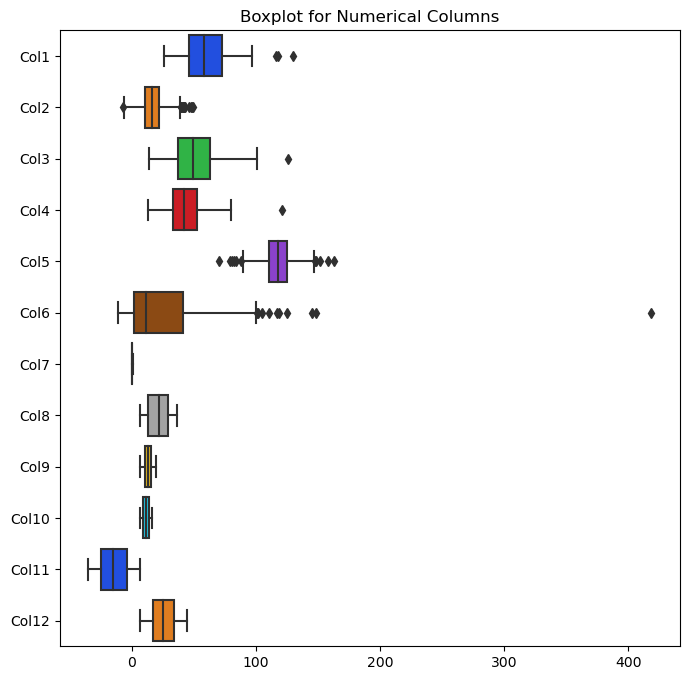

In [10]:
# Check distribution of numerical data
plt.figure(figsize=(8, 8))
sns.boxplot(data=data, orient='h', palette='bright')
plt.title('Boxplot for Numerical Columns')
plt.show()

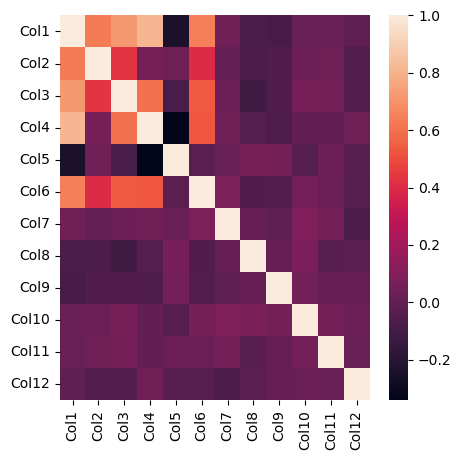

In [11]:
# Check heatmap of the columns
plt.figure(figsize=(5, 5))
sns.heatmap(data.corr(numeric_only=True))
plt.show()

In [12]:
# Handling Outliers
col_with_outliers = ["Col1", "Col2", "Col3", "Col4", "Col5", "Col6"]
for col in col_with_outliers:
  data[col] = mstats.winsorize(data[col], limits=[0.05, 0.05])

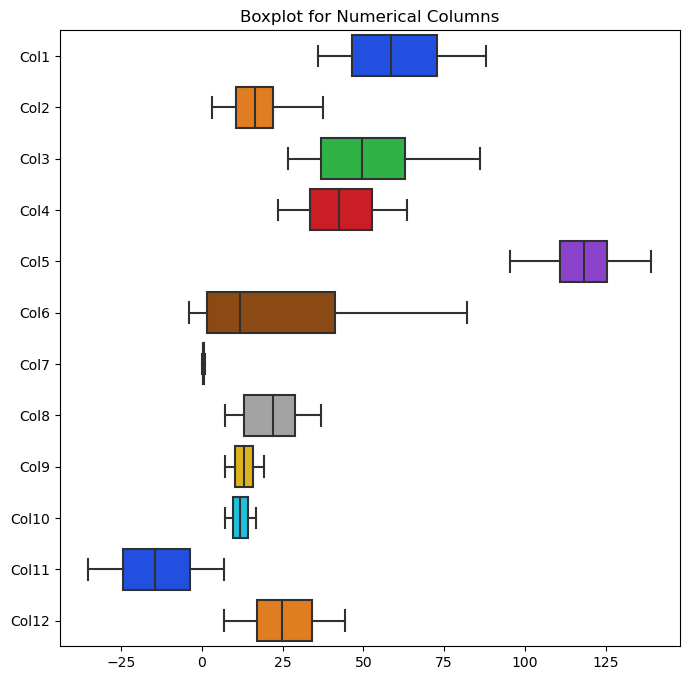

In [13]:
# Check distribution of numerical data
plt.figure(figsize=(8, 8))
sns.boxplot(data=data, orient='h', palette='bright')
plt.title('Boxplot for Numerical Columns')
plt.show()

In [14]:
# Split Data
x_train,x_split,y_train,y_split = tts(data.drop('Class_att', axis=1), data['Class_att'], train_size=0.8, random_state=42)
x_val,x_test,y_val,y_test = tts(x_split, y_split, test_size=0.5, random_state=42)

# Scale the X data
ss = SS()
x_train = ss.fit_transform(x_train)
x_val = ss.transform(x_val)
x_test = ss.transform(x_test)

# Encode the Y data
le = LE()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

print(f"x_train: {len(x_train)}\nx_val: {len(x_val)}\nx_test: {len(x_test)}\n")
print(f"y_train: {len(y_train)}\ny_val: {len(y_val)}\ny_test: {len(y_test)}")

x_train: 248
x_val: 31
x_test: 31

y_train: 248
y_val: 31
y_test: 31


In [15]:
# Create Model
model1 = models.Sequential()

model1.add(layers.InputLayer(input_shape=(x_train.shape[1],)))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(2, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               6656      
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [16]:
# Compile and Train Model
optimizer = Adam(learning_rate=1e-4)
model1.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), batch_size=24, verbose=2)

Epoch 1/50
11/11 - 3s - loss: 1.3325 - accuracy: 0.5242 - val_loss: 0.9041 - val_accuracy: 0.4194 - 3s/epoch - 242ms/step
Epoch 2/50
11/11 - 0s - loss: 1.2963 - accuracy: 0.4960 - val_loss: 0.9179 - val_accuracy: 0.3548 - 90ms/epoch - 8ms/step
Epoch 3/50
11/11 - 0s - loss: 1.2456 - accuracy: 0.4798 - val_loss: 0.9214 - val_accuracy: 0.3226 - 86ms/epoch - 8ms/step
Epoch 4/50
11/11 - 0s - loss: 1.2358 - accuracy: 0.5121 - val_loss: 0.9253 - val_accuracy: 0.3226 - 86ms/epoch - 8ms/step
Epoch 5/50
11/11 - 0s - loss: 0.9843 - accuracy: 0.6008 - val_loss: 0.9309 - val_accuracy: 0.3226 - 89ms/epoch - 8ms/step
Epoch 6/50
11/11 - 0s - loss: 1.0169 - accuracy: 0.6290 - val_loss: 0.9332 - val_accuracy: 0.3548 - 83ms/epoch - 8ms/step
Epoch 7/50
11/11 - 0s - loss: 1.1552 - accuracy: 0.5202 - val_loss: 0.9375 - val_accuracy: 0.3548 - 84ms/epoch - 8ms/step
Epoch 8/50
11/11 - 0s - loss: 1.1113 - accuracy: 0.5444 - val_loss: 0.9355 - val_accuracy: 0.4194 - 88ms/epoch - 8ms/step
Epoch 9/50
11/11 - 0s - 

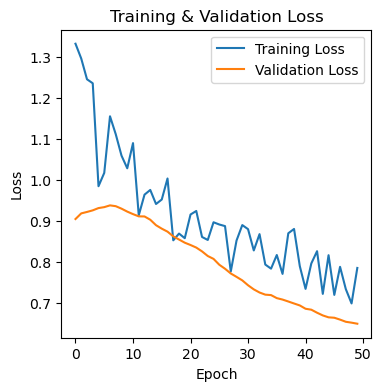

In [17]:
# Plot Training History
plt.figure(figsize=(4, 4))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

In [18]:
# Model Evaluation
y_pred_1 = model1.predict(x_test)
y_pred_1 = np.argmax(y_pred_1, axis=1)
acc_1 = acc(y_test, y_pred_1)
pres_1 = pres(y_test, y_pred_1)
recall_1 = recall(y_test, y_pred_1)
f1_1 = f1(y_test, y_pred_1)

print("\n--Model Performance--")
print(f"Accuracy: {acc_1:.3f}")
print(f"Precision: {pres_1:.3f}")
print(f"Recall: {recall_1:.3f}")
print(f"F1-Score: {f1_1:.3f}")

1/1 [==============================] - 0s 171ms/step

--Model Performance--
Accuracy: 0.871
Precision: 0.727
Recall: 0.889
F1-Score: 0.800


In [19]:
# Clear Session
tf.keras.backend.clear_session()

# CASE 2 (CNN)

In [94]:
# Load Data
train_path = "./DATA2/train/"
val_path = "./DATA2/valid/"
test_path = "./DATA2/test/"

batch_size = 16
img_size = (64, 64)

train_dataset = image_dataset_from_directory(train_path, shuffle=False, label_mode="categorical", batch_size=batch_size, image_size=img_size, color_mode="grayscale")
val_dataset = image_dataset_from_directory(val_path, shuffle=False, label_mode="categorical", batch_size=batch_size, image_size=img_size, color_mode="grayscale")
test_dataset = image_dataset_from_directory(test_path, shuffle=False, label_mode="categorical", batch_size=batch_size, image_size=img_size, color_mode="grayscale")

Found 2800 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 6 files belonging to 2 classes.


In [95]:
# Create Model
model2 = models.Sequential()

model2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dropout(0.8))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(2, activation='softmax'))

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 62, 62, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 29, 29, 128)       512       
 chNormalization)                                                
                                                        

In [96]:
# Compile and Train Model
optimizer = SGD(learning_rate=1e-4)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_dataset, epochs=10, validation_data=val_dataset, verbose=2)

Epoch 1/10
175/175 - 13s - loss: 2.1039 - accuracy: 0.5461 - val_loss: 0.7795 - val_accuracy: 0.5350 - 13s/epoch - 77ms/step
Epoch 2/10
175/175 - 11s - loss: 1.8134 - accuracy: 0.5479 - val_loss: 0.8015 - val_accuracy: 0.5550 - 11s/epoch - 64ms/step
Epoch 3/10
175/175 - 11s - loss: 1.6484 - accuracy: 0.5525 - val_loss: 0.6674 - val_accuracy: 0.6250 - 11s/epoch - 65ms/step
Epoch 4/10
175/175 - 12s - loss: 1.3844 - accuracy: 0.5832 - val_loss: 0.6408 - val_accuracy: 0.6700 - 12s/epoch - 67ms/step
Epoch 5/10
175/175 - 16s - loss: 1.2881 - accuracy: 0.5971 - val_loss: 0.5959 - val_accuracy: 0.6800 - 16s/epoch - 89ms/step
Epoch 6/10
175/175 - 13s - loss: 1.1894 - accuracy: 0.5961 - val_loss: 0.5910 - val_accuracy: 0.6750 - 13s/epoch - 72ms/step
Epoch 7/10
175/175 - 11s - loss: 1.1342 - accuracy: 0.6025 - val_loss: 0.5812 - val_accuracy: 0.6850 - 11s/epoch - 65ms/step
Epoch 8/10
175/175 - 11s - loss: 1.0346 - accuracy: 0.6179 - val_loss: 0.5792 - val_accuracy: 0.7100 - 11s/epoch - 65ms/step


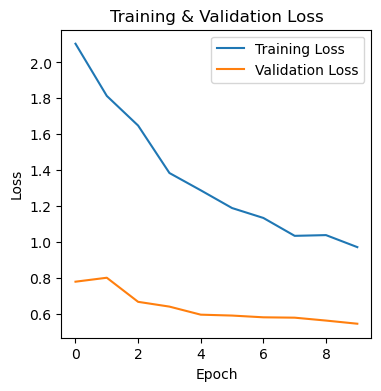

In [97]:
# Plot Training History
plt.figure(figsize=(4, 4))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

In [98]:
# Model Evaluation
model2.evaluate(test_dataset)

1/1 [==============================] - 0s 50ms/step - loss: 0.4147 - accuracy: 1.0000


[0.41467854380607605, 1.0]

Real Predictions: [[0.70441645 0.2955836 ]
 [0.7739181  0.2260819 ]
 [0.63876814 0.36123183]
 [0.49245566 0.5075443 ]
 [0.22168879 0.77831113]
 [0.39612162 0.60387844]]

Predictions: [0 0 0 1 1 1]
Real: [0 0 0 1 1 1]


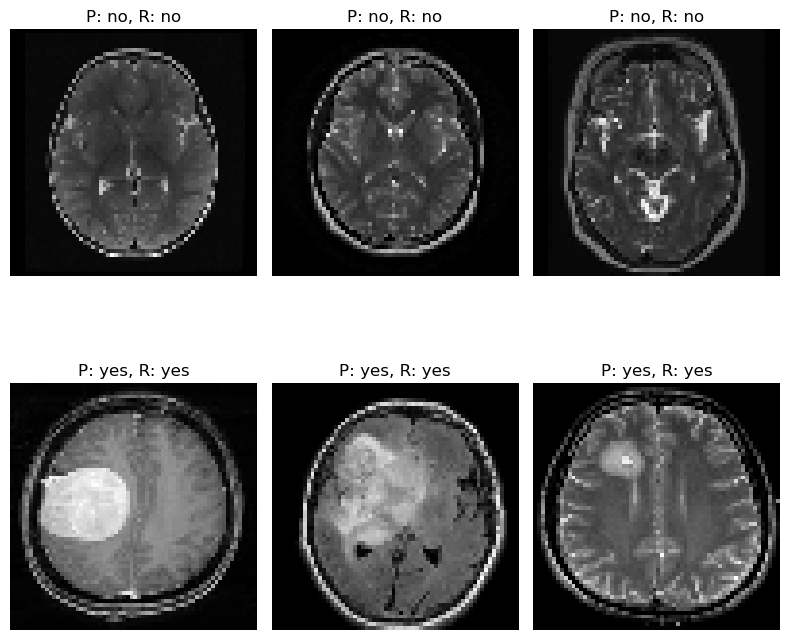

In [99]:
# Model Predictions
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
class_names = test_dataset.class_names
predictions = model2.predict_on_batch(image_batch)
print(f"Real Predictions: {predictions}\n")
predictions = np.argmax(predictions, axis=1)
print(f"Predictions: {predictions}")
print(f"Real: {np.argmax(label_batch, axis=1)}")

plt.figure(figsize=(8, 8))
for i in range(len(label_batch)):
  ax = plt.subplot(2, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"), cmap="gray")
  plt.title(f"P: {class_names[predictions[i]]}, R: {class_names[np.argmax(label_batch[i])]}")
  plt.axis("off")
plt.tight_layout()
plt.show()

In [100]:
# Clear Session
tf.keras.backend.clear_session()